CHURN PREDICTION

In [1]:
import pandas as pd
import numpy as np
import tensorflow

In [2]:
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [18]:
df = pd.read_csv("Churn_Modelling.csv")
print(df.shape)
df.head()


(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
df.duplicated().sum()

0

In [21]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [22]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [23]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
df =pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [25]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [26]:
X= df.drop(columns=["Exited"])
y=df['Exited']

In [28]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [29]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=1)

In [32]:
X_train.shape


(8000, 11)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [34]:
X_test_scaled

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

In [35]:
model = Sequential()

In [ ]:
#layers

model.add(Dense(3, activation='sigmoid',input_dim=11))
#input layer = model.add(Dense(number of layers, activation='which one',input_dim= how many imputs))

model.add(Dense(1,activation='sigmoid'))  #output layer


c:\Users\ggaur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss = 'binary_crossentropy', optimizer='Adam')

In [39]:
model.fit(X_train_scaled,y_train, epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0052
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7523
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6281
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5618
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5290
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5093
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4885
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4648
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4653
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4482
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4289
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4378
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4304
Epoch 14/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4294
Epoch 15/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [44]:
model.layers[0].get_weights()

[array([[ 0.19507232, -0.02464452,  0.05596998],
        [-0.9265498 ,  2.806753  , -1.6136409 ],
        [-0.03082644,  0.0096073 ,  0.14581881],
        [-0.59698594,  0.01572726, -0.20007627],
        [-0.08024905, -0.14393416,  0.16951346],
        [ 0.17356719,  0.03695324, -0.04649487],
        [ 1.130295  , -0.31317568,  0.86204046],
        [-0.23255697,  0.04053721,  0.1036921 ],
        [-0.9194958 ,  0.4318556 , -0.55552953],
        [-0.02946413, -0.02232367, -0.1047693 ],
        [ 0.5214    , -0.30607396,  0.6483188 ]], dtype=float32),
 array([ 0.37066087, -0.6577921 ,  0.30837768], dtype=float32)]

In [45]:
model.layers[1].get_weights()

[array([[-1.043291  ],
        [ 1.1879432 ],
        [-0.97205645]], dtype=float32),
 array([-0.95068675], dtype=float32)]

In [47]:
y_hat=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [49]:
#let threshhold be 0.5, meaning will leave over it and not under it

y_pred= np.where(y_hat>0.5,1,0)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8155

improve the accuracy

In [55]:
model_improv = Sequential()
model_improv.add(Dense(11,activation='relu', input_dim=11))
model_improv.add(Dense(11,activation='relu'))
model_improv.add(Dense(1,activation='sigmoid'))

c:\Users\ggaur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122 (492.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82 (332.00 B)

In [57]:
model_improv.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [64]:
history = model.fit(X_train_scaled,y_train, epochs=100, validation_split=0.2)

Epoch 1/100


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4130 - val_loss: 0.4109
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4020 - val_loss: 0.4109
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4211 - val_loss: 0.4108
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4082 - val_loss: 0.4107
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3945 - val_loss: 0.4106
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4122 - val_loss: 0.4105
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4051 - val_loss: 0.4105
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4073 - val_loss: 0.4105
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3961 - val_loss: 0.4104
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4093 - val_loss: 0.4104
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4128 - val_loss: 0.4103
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [65]:
y_hat_improv=model_improv.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [79]:
y_pred_improv= np.where(y_hat_improv>0.5,1,0)

In [80]:
accuracy_score(y_test, y_pred_improv)

0.725

In [81]:
history.history

{'loss': [0.40584275126457214,
  0.405818909406662,
  0.40563908219337463,
  0.4055701196193695,
  0.4054453372955322,
  0.40540364384651184,
  0.4053242802619934,
  0.4052651524543762,
  0.40518292784690857,
  0.4050232172012329,
  0.40499618649482727,
  0.40494561195373535,
  0.4048614203929901,
  0.40478119254112244,
  0.4046848714351654,
  0.40460604429244995,
  0.40454375743865967,
  0.4044605493545532,
  0.4044201374053955,
  0.4042983949184418,
  0.40426769852638245,
  0.40424636006355286,
  0.40412983298301697,
  0.4040783941745758,
  0.4040595591068268,
  0.40398868918418884,
  0.4039531648159027,
  0.403873085975647,
  0.40378203988075256,
  0.40376266837120056,
  0.40370500087738037,
  0.4036839008331299,
  0.4035884439945221,
  0.40355804562568665,
  0.40352022647857666,
  0.4034906029701233,
  0.40341299772262573,
  0.4033757150173187,
  0.4033629596233368,
  0.40323927998542786,
  0.4031980037689209,
  0.40320029854774475,
  0.40314236283302307,
  0.4031137228012085,
  0.

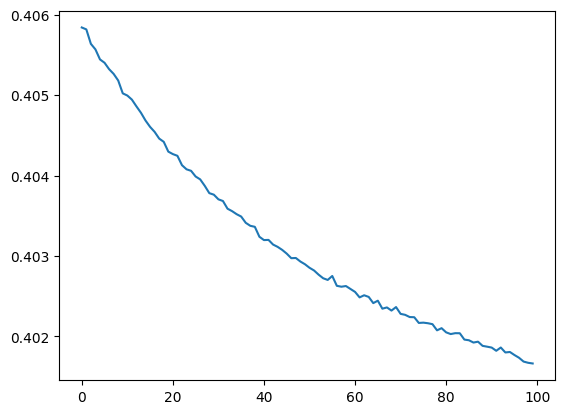

In [86]:
plt.plot(history.history['loss'])


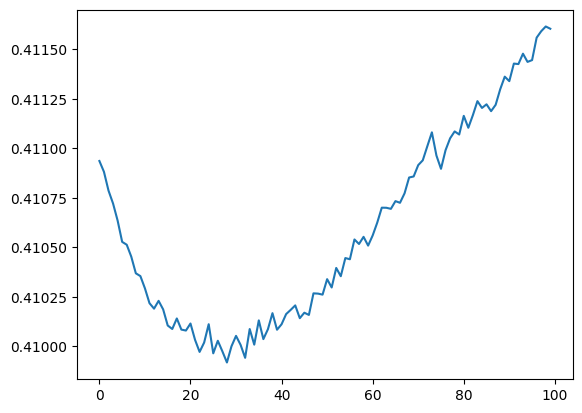

In [87]:
plt.plot(history.history['val_loss'])